# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower_Name"]

# Dataset url
# from HHDD
url = "datasets/iris/iris.csv"

dataset = pd.read_csv(url, header = None, names = colnames )

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
print(dataset.shape)

dataset.head()


(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [4]:
dataset = dataset.dropna()

dataset1 = dataset.drop(["Sepal_Length", "Sepal_Width"], axis=1)
dataset2 = dataset.drop(["Petal_Length", "Petal_Width"], axis=1)

print(dataset1.shape)
print(dataset2.shape)

(150, 3)
(150, 3)


3. Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column
dataset = dataset.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset1 = dataset1.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
dataset2 = dataset2.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [6]:
# Drop out non necesary columns
#dataset.drop(['ID', 'Age', 'Gender', 'Glasses', 'GlassesGroup', 'Height', 'Complete', 'CompleteGroup', 'Score'],axis='columns',inplace=True)
#Not neccessary to delete in this case
#Visualize the dataset
#dataset


5. Scatter plot of the data

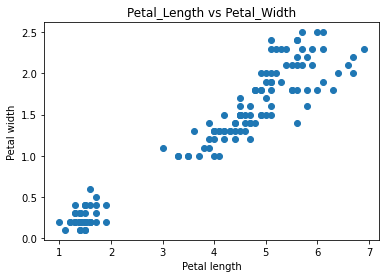

In [7]:
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

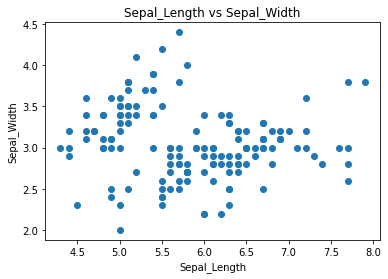

In [8]:
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-9-629eb1334cd9>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-setosa')
<ipython-input-9-629eb1334cd9>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-versicolor')
<ipython-input-9-629eb1334cd9>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-virginica')


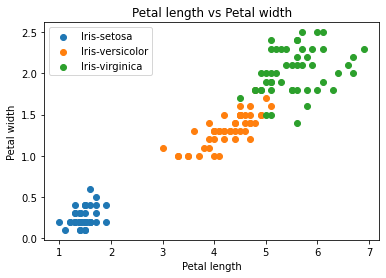

In [9]:
df1 = dataset1[dataset1.Flower_Name==0]
df2 = dataset1[dataset1.Flower_Name==1]
df3 = dataset1[dataset1.Flower_Name==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-setosa')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-versicolor')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-virginica')

plt.title('Petal length vs Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

<ipython-input-10-76c44bac4bc7>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-setosa')
<ipython-input-10-76c44bac4bc7>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-versicolor')
<ipython-input-10-76c44bac4bc7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-virginica')


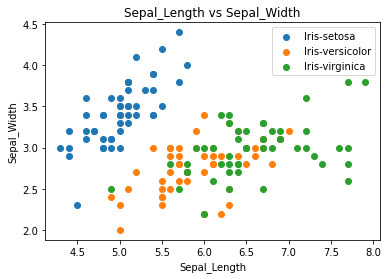

In [10]:
df1 = dataset2[dataset2.Flower_Name==0]
df2 = dataset2[dataset2.Flower_Name==1]
df3 = dataset2[dataset2.Flower_Name==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-setosa')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-versicolor')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-virginica')

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [11]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

In [12]:
# Define number of clusters
kmp = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = kmp.fit_predict(dataset1[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# Define number of clusters
kms = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
ys = kms.fit_predict(dataset2[['Sepal_Length','Sepal_Width']])

# Print estimated cluster of each point in the dataser
ys

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
# Add a new column to the dataset with the cluster information
dataset2['Cluster_Type_Sepal'] = ys

# Visualize the dataset
dataset2

,Sepal_Length,Sepal_Width,Flower_Name,Cluster_Type_Sepal
0,5.1,3.5,0,1
1,4.9,3.0,0,1
2,4.7,3.2,0,1
3,4.6,3.1,0,1
4,5.0,3.6,0,1
...,...,...,...,...
145,6.7,3.0,2,2
146,6.3,2.5,2,0
147,6.5,3.0,2,2
148,6.2,3.4,2,2


In [15]:
# Add a new column to the dataset with the cluster information
dataset1['Cluster_Type_Petal'] = yp

# Visualize the dataset
dataset1

,Petal_Length,Petal_Width,Flower_Name,Cluster_Type_Petal
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0
...,...,...,...,...
145,5.2,2.3,2,1
146,5.0,1.9,2,1
147,5.2,2.0,2,1
148,5.4,2.3,2,1


In [16]:
# Visualize the ID of the clusters
dataset2.Cluster_Type_Sepal.unique()

array([1, 2, 0])

In [17]:
# Visualize the ID of the clusters
dataset1.Cluster_Type_Petal.unique()

array([0, 2, 1])

In [18]:
# Center of each cluster
kms.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

In [19]:
# Center of each cluster
kmp.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [20]:
# Sum of squared error
kms.inertia_

37.0507021276596

In [21]:
# Sum of squared error
kmp.inertia_

31.371358974358966

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-22-c8cfac6af1f2>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Estimated Group 1 Iris-setosa Petal')
<ipython-input-22-c8cfac6af1f2>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Estimated Group 2 Iris-versicolor Petal')
<ipython-input-22-c8cfac6af1f2>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Estimated Group 3 Iris-virginica Petal')


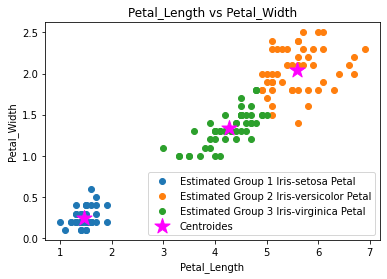

In [22]:
df1 = dataset1[dataset1.Cluster_Type_Petal==0]
df2 = dataset1[dataset1.Cluster_Type_Petal==1]
df3 = dataset1[dataset1.Cluster_Type_Petal==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Estimated Group 1 Iris-setosa Petal')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Estimated Group 2 Iris-versicolor Petal')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Estimated Group 3 Iris-virginica Petal')

plt.scatter(kmp.cluster_centers_[:,0], kmp.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

<ipython-input-23-03cb0355e1ef>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Estimated Group 1 Iris-setosa Petal sepal')
<ipython-input-23-03cb0355e1ef>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Estimated Group 2 Iris-versicolor Petal sepal')
<ipython-input-23-03cb0355e1ef>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Group 3 Iris-virginica Petal sepal')


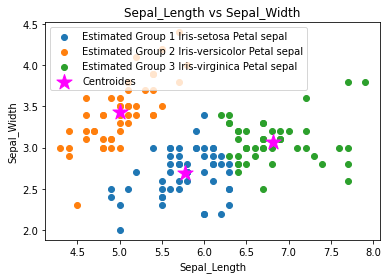

In [23]:
df1 = dataset2[dataset2.Cluster_Type_Sepal==0]
df2 = dataset2[dataset2.Cluster_Type_Sepal==1]
df3 = dataset2[dataset2.Cluster_Type_Sepal==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Estimated Group 1 Iris-setosa Petal sepal')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Estimated Group 2 Iris-versicolor Petal sepal')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Group 3 Iris-virginica Petal sepal')

plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

Plot real clusters and visual comparison

<ipython-input-26-982f226b5381>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Petal Iris-setosa via Kmeans')
<ipython-input-26-982f226b5381>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Petal Iris-versicolor via Kmeans')
<ipython-input-26-982f226b5381>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Petal Iris-virginica via Kmeans')


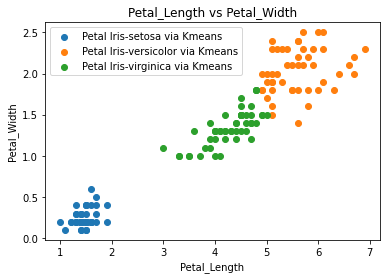

<ipython-input-26-982f226b5381>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Petal Iris-setosa original')
<ipython-input-26-982f226b5381>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df4.Petal_Length, df4.Petal_Width, Label='Petal Iris-versicolor original')
<ipython-input-26-982f226b5381>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df5.Petal_Length, df5.Petal_Width, Label='Petal Iris-virginica original')


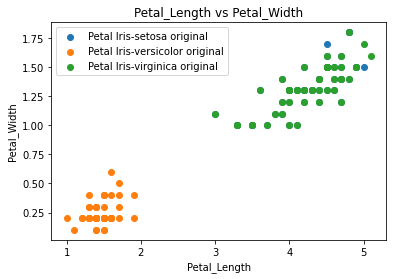

In [26]:
df1 = dataset1[dataset1.Cluster_Type_Petal==0]
df2 = dataset1[dataset1.Cluster_Type_Petal==1]
df3 = dataset1[dataset1.Cluster_Type_Petal==2]

df4 = dataset[dataset.Flower_Name==0]
df5 = dataset[dataset.Flower_Name==1]
df6 = dataset[dataset.Flower_Name==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Petal Iris-setosa via Kmeans')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Petal Iris-versicolor via Kmeans')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Petal Iris-virginica via Kmeans')

plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Petal Iris-setosa original')
plt.scatter(df4.Petal_Length, df4.Petal_Width, Label='Petal Iris-versicolor original')
plt.scatter(df5.Petal_Length, df5.Petal_Width, Label='Petal Iris-virginica original')

plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

<ipython-input-27-1acfbb3148d9>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Sepal Iris-setosa via Kmeans')
<ipython-input-27-1acfbb3148d9>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Sepal Iris-versicolor via Kmeans')
<ipython-input-27-1acfbb3148d9>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Sepal Iris-virginica via Kmeans')


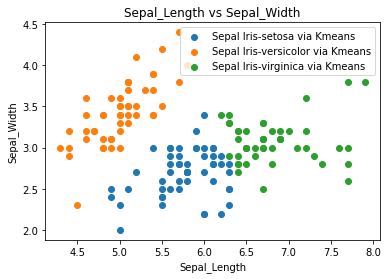

<ipython-input-27-1acfbb3148d9>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Sepal Iris-setosa original')
<ipython-input-27-1acfbb3148d9>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df4.Sepal_Length, df4.Sepal_Width, Label='Sepal Iris-versicolor original')
<ipython-input-27-1acfbb3148d9>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df5.Sepal_Length, df5.Sepal_Width, Label='Sepal Iris-virginica original')


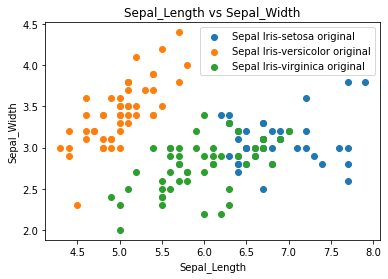

In [27]:
df1 = dataset2[dataset2.Cluster_Type_Sepal==0]
df2 = dataset2[dataset2.Cluster_Type_Sepal==1]
df3 = dataset2[dataset2.Cluster_Type_Sepal==2]

df4 = dataset[dataset.Flower_Name==0]
df5 = dataset[dataset.Flower_Name==1]
df6 = dataset[dataset.Flower_Name==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Sepal Iris-setosa via Kmeans')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Sepal Iris-versicolor via Kmeans')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Sepal Iris-virginica via Kmeans')

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Sepal Iris-setosa original')
plt.scatter(df4.Sepal_Length, df4.Sepal_Width, Label='Sepal Iris-versicolor original')
plt.scatter(df5.Sepal_Length, df5.Sepal_Width, Label='Sepal Iris-virginica original')

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [33]:
ssep = []
k_rng = range(1,10)
for k in k_rng:
    kmp = KMeans(n_clusters=k)
    kmp.fit_predict(dataset1[['Petal_Length','Petal_Width']])
    ssep.append(kmp.inertia_)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
sses = []
k_rng = range(1,10)
for k in k_rng:
    kms = KMeans(n_clusters=k)
    kms.fit_predict(dataset2[['Sepal_Length','Sepal_Width']])
    sses.append(kms.inertia_)

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


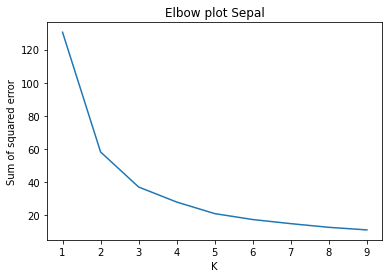

In [35]:
plt.plot(k_rng,sses)

plt.title('Elbow plot Sepal')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

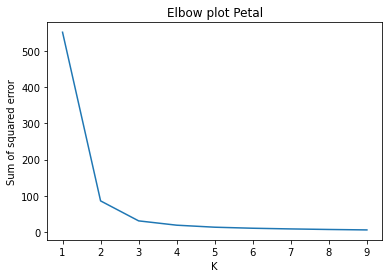

In [36]:
plt.plot(k_rng,ssep)

plt.title('Elbow plot Petal')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.
OK

2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.
OK

3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible
OK


5. Draw conclusiones:
    - About the scalling: does it helps or not? Si, el poder hacerlo facilita la lectura de los datos y su visualizacion
    - About the elbow plot: does the K agree with the real number of clusters? Si concuerda, se peude observar en la grafica de elbow anteriormente creada como se tienen tres lineas principales, para cada caso. Indicando los 3 clusteres de los que en comparacion a la clasificacion de flores se clasifican en tres de igual forma.
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why? Considero que la grafica de los petalos esta mejor agrupada y se puede llegar a un rsultado mas certero, los petalos de las flores tienen caracteristicas muy similares segun sus iguales y esto permite a Kmeans crear clusteres mejor agrupados con mejores centros que practicamente se asemejan al real.